In [8]:
import math
import time
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style
import paste as pst
import ot
import seaborn
from anndata import AnnData
import yaml
from pathlib import Path
import os
import random
import torch

from typing import List, Mapping, Optional, Union
import random

In [13]:
! pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 31.2 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)


In [14]:
sys.path.append("../../scSLAT/viz")
from multi_dataset import match_3D_celltype, match_3D_multi

In [2]:
adata1 = sc.read_h5ad('./adata1.h5ad')
adata2 = sc.read_h5ad('./adata2.h5ad')

In [ ]:
alpha = 0.1

In [ ]:
pi0 = pst.match_spots_using_spatial_heuristic(adata1.obsm['spatial'], adata2.obsm['spatial'], use_ot=True)
pi12 = pst.pairwise_align(adata1, adata2, use_gpu=True, backend=ot.backend.TorchBackend(), 
                          alpha=alpha, G_init=pi0, norm=True, verbose=True)

In [ ]:
result = pd.DataFrame(pi12)

In [3]:
result = pd.read_csv('./paste_alignment.csv', index_col=0)

In [5]:
matching_index = np.argmax(result.to_numpy(),axis=0)
matching = np.array([np.arange(result.shape[1]),matching_index])

In [7]:
adata1_df = pd.DataFrame({'index':range(adata1.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index':range(adata2.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})

/rd2/user/xiacr/SLAT/case/mouse_development/../../scSLAT/viz/multi_dataset.py:242: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 18 cell types; dataset2: 22 cell types; 
                    Total :29 celltypes; Overlap: 11 cell types 
                    Not overlap :[['Dermomyotome', 'Head mesenchyme', 'Surface ectoderm', 'Spinal cord', 'Inner ear', 'Branchial arch', 'Sclerotome', 'Epidermis', 'Mesothelium', 'Mesentery', 'Mucosal epithelium', 'Muscle', 'Cartilage primordium', 'Ovary', 'Kidney', 'Choroid plexus', 'Sympathetic nerve', 'Pancreas']]
Subsample 300 cell pairs from 10001


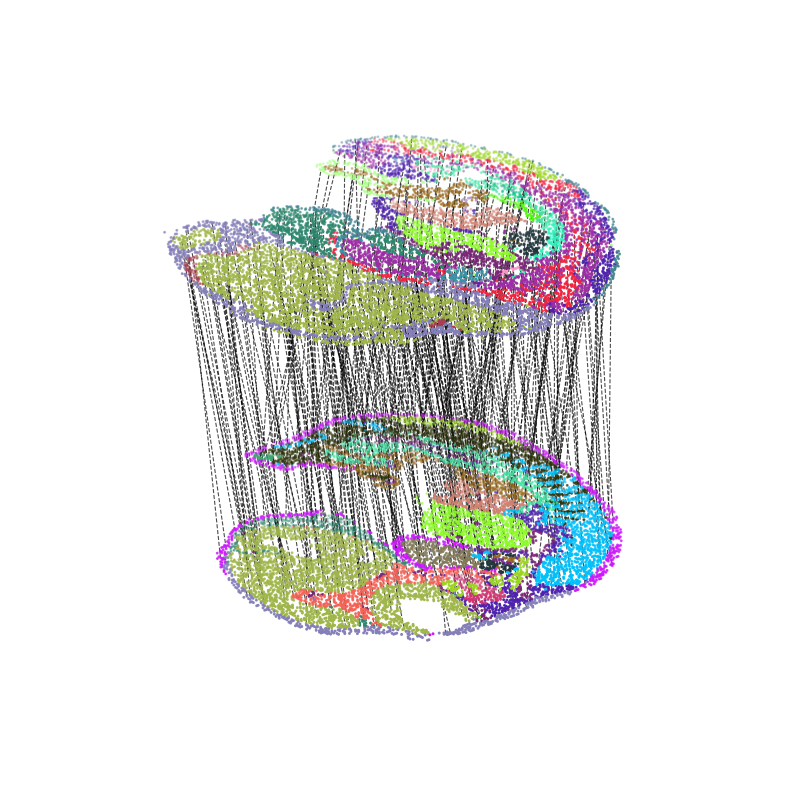

In [15]:
all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)

In [16]:
all_celltypes = np.unique(adata1.obs['annotation']).tolist()

/rd2/user/xiacr/SLAT/case/mouse_development/../../scSLAT/viz/multi_dataset.py:242: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 18 cell types; dataset2: 22 cell types; 
                    Total :29 celltypes; Overlap: 11 cell types 
                    Not overlap :[['Dermomyotome', 'Head mesenchyme', 'Surface ectoderm', 'Spinal cord', 'Inner ear', 'Branchial arch', 'Sclerotome', 'Epidermis', 'Mesothelium', 'Mesentery', 'Mucosal epithelium', 'Muscle', 'Cartilage primordium', 'Ovary', 'Kidney', 'Choroid plexus', 'Sympathetic nerve', 'Pancreas']]
Subsample 10000 cell pairs from 10001


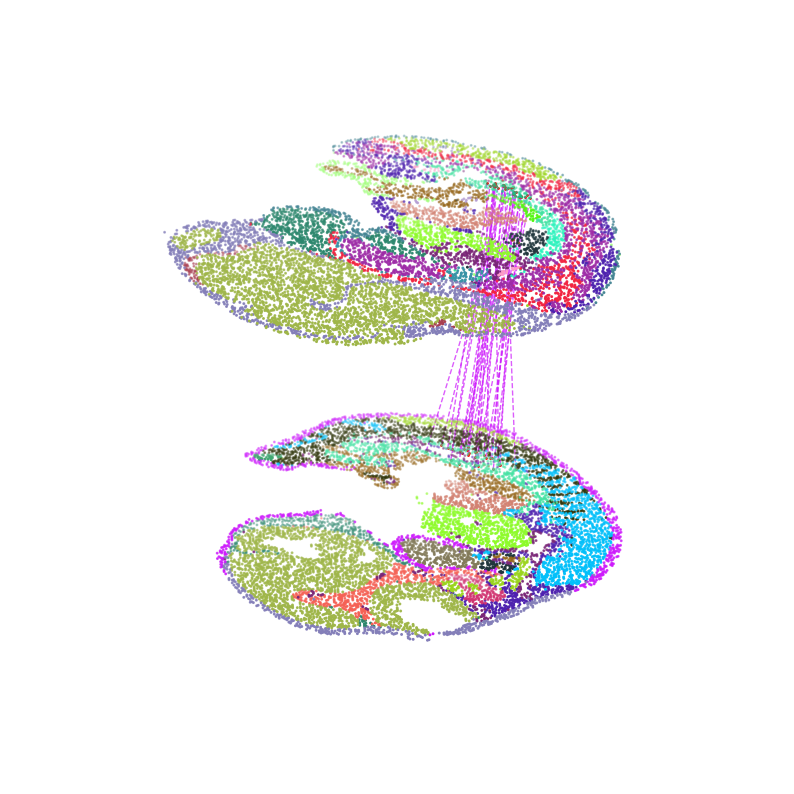

In [20]:
kidney_match = match_3D_celltype(adata1_df, adata2_df, matching, meta='celltype',
                                highlight_celltype=[['Urogenital ridge'], ['Kidney']],
                                scale_coordinate=True,
                                subsample_size=10000, highlight_cell=['red'])
kidney_match.draw_3D(size=[10, 12], line_width=1, point_size=[1.2,1.2], hide_axis=True)